# Notebook for Data presentations

### Load and Config Packages

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm  

#%matplotlib qt

## Group Structure

Group data needed for post-processing:

In [29]:
R = np.array([[0, -1],[1, 0]])
M = np.array([[1, 0],[0, -1]])
G = np.zeros([2,2,8])
G[:,:,0] = np.eye(2) # The D_4 group [via it's faithful 2d rep]
G[:,:,1] = R
G[:,:,2] = R@R
G[:,:,3] = R@R@R
G[:,:,4] = M
G[:,:,5] = M@R
G[:,:,6] = M@R@R
G[:,:,7] = M@R@R@R
g_lab = ['$e$','$r$','$r^2$','$r^3$','$m$','$mr$','$mr^2$','$mr^3$']
order = len(g_lab)
# Binary encoding: | M, R, RR> -> 8 element encoding needs to be translated in this formalism
encode = {'000':0,'010':1, '001':2, '011':3, '100':4,'110':5, '101':6, '111':7}

C_e = np.array([0])  # Conj Classes
C_r = np.array([1,3])
C_rr = np.array([2])
C_m = np.array([4,6])
C_mr = np.array([5,7])

Z_e = np.array([0, 1, 2, 3, 4, 5, 6, 7])  # Centers Classes
Z_r = np.array([0, 1, 2, 3])
Z_rr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
Z_m = np.array([0, 2, 4, 6])
Z_mr = np.array([0, 2, 5, 7])

Function to query the group structure:

In [30]:
def dag(M):
    return np.conjugate(M.T)
def matInv(M):
    return np.linalg.inv(M)
def is_eq(A,B):
    return np.array_equal(A,B)

def q(c):
    Q_C = [0, 0, 0, 4, 0, 0, 3, 3] # This for q_c instead : Coset Representatives
    return Q_C[c]

def grp(x):
    return G[:,:,x] # USE G AS A GLOBAL VAR!!! ---- CAREFUL !


def grp_i(i):
    return matInv(G[:,:,i])

def index(h):
    for i in range(8): # to be generalised
        if np.array_equal(h, G[:,:,i]):
            return i

def inv(x):
    for i in range(8): # to be generalised
        if np.array_equal(matInv(G[:,:,x]), G[:,:,i]):
            return i

## Data Analysis

In [31]:
# Obsolete Results:
results = [186, 52, 199, 68, 39, 14, 31, 21, 58, 28, 51, 27, 13, 2, 14, 6, 172, 72, 183, 59, 30, 14, 41, 8, 54, 29, 48, 27, 12, 4, 17, 2] # Fusion
# results = [402, 104, 163, 110, 93, 32, 60, 32, 95, 43, 98, 40, 22, 12, 32, 10, 185, 57, 72, 67, 75, 28, 56, 21, 53, 34, 60, 25, 12, 10, 21, 5] # braid prot I
# results = [71, 42, 86, 33, 20, 9, 27, 10, 61, 28, 35, 17, 10, 12, 13, 7, 87, 40, 63, 36, 22, 19, 17, 17, 31, 23, 34, 27, 12, 2, 8, 5] # braid prot II

# New Circuit For Fusion
# 16k runs:
results = [[176,  57, 210,  44,  96,  28, 103,  23],[ 87,  18,  71,  15,  38,  14,  38,  10],[171,  54, 188,  49,  88,  24,  84,  25],[ 66,   9,  53,  15,  20,   8,  27,   5]]
# No SyC only CZ
# results = [[211,  48, 202,  57,  95,  24,  96,  29], [ 71,  20,  69,  16,  23,   8,  38,   6], [182,  43, 174,  56,  90,  22,  94,  25], [ 57,  15,  52,  14,  23,  10,  20,   5]]
# No Simple Swaps
# results = [[188,  61, 188,  63,  97,  24, 122,  25],[ 73,  27,  74,  19,  44,  15,  39,   7],[165,  61, 166,  46,  62,  30,  90,  32],[ 72,  24,  73,  21,  41,   8,  26,   9]]
# Rerun of Daans Code
#results = [[149,  65, 153,  62,  46,  10,  31,  10],[ 47,  22,  51,  15,   8,   5,   9,   4],[127,  39, 135,  57,  28,  12,  28,   8],[ 47,  13,  50,  14,  11,   1,  10,   3]]
# Cherry-Picked Fusion
results = [[62,  9, 54, 12,  6,  4, 18,  1],[ 6,  2,  4,  1,  2,  0,  0,  0],[57, 10, 41, 14, 11,  4, 20,  4],[ 4,  2,  6,  2 , 0 , 0  ,1  ,0]]
results = [[43  ,9 ,70 ,10 ,10  ,3, 14,  2]
 ,[ 8,  1,  6,  3 , 2,  0  ,3,  1]
 ,[40 , 6 ,46  ,6,  9 , 2 ,10 , 3]
 ,[ 9  ,1  ,3 , 4  ,4  ,1,  2 , 1]]
results = [[64 , 9, 53 , 7 , 9 , 2 ,15,  3],
 [11 , 0, 10,  1,  1,  1,  2 , 0],
 [59  ,9 ,51 , 4 ,14  ,0 ,12  ,2],
 [ 4 , 5 , 7 , 1 , 0 , 0 , 0 , 0]]
results = [[57, 13, 51, 15, 12,  1, 13,  2],
 [ 9,  1, 13,  0,  1,  0 , 2 , 1],
 [45, 11, 46,  7 ,15,  2, 14,  2],
 [ 7 , 1 , 3 , 0 , 5 , 0 , 1,  0]]

In [32]:
# The Cherry Picked Fusion
results_best_fusion = [[287,  62, 262,  64,  64, 12,  77,  13],
 [ 39,   9,  41,   7,  16,   0,  11,   2],
 [250, 55, 273,  39,  52,   4,  50,  12],
 [ 39,   9,  36 ,  3,   7 ,  2,  10,   0]]

# The Cherry Picked Braids
# the LINK
results_best_link = [[1891,  202,  449 , 189 , 300,   96,  286,   22],
 [ 142 ,  16,  126,   18,   37 ,   6 ,  31 ,   3],
 [ 435 , 105 ,  95  , 92 , 142  , 58 , 103 ,  19],
 [  52 ,  19 ,  44 ,  13 ,  19 ,   1 ,  20 ,   5]]
# The Fuse
results_best_braid_fuse = [[263,  46 ,254 , 71 ,109 , 12 , 83 , 15],
 [ 61 , 10 , 65 ,  7 , 18 ,  2 , 15 ,  2],
 [245 , 49 ,255 , 52,  86,  14,  89,  14],
 [ 35 , 13 , 47 ,  6 , 18 ,  3 , 14 ,  4]]

results = results_best_braid_fuse

results = [[492,  69 ,570 , 72 , 70  ,13 , 70 ,  7],
 [ 60 ,  7 , 56 ,  6 , 10 ,  1 ,  7  , 0],
 [ 24 ,  2,  26 ,  5 , 21 ,  0 , 20 ,  2],
 [  3 ,  2 ,  5 ,  0,   3 ,  0 ,  4 ,  0]]

results = [[298 , 93, 305,  91 , 59 , 24 , 61 , 26],
 [ 72 , 21 , 72 , 21 , 14 ,  7 , 18 , 12],
 [295 , 98 ,262 , 86 , 60 , 19 , 62 , 29],
 [ 68 , 36 , 63 , 18 , 19  , 8 , 14 ,  9]]

results = np.array(results)
print(results.sum().sum())
print(results)
results.size
results = (results).reshape([results.size])

2340
[[298  93 305  91  59  24  61  26]
 [ 72  21  72  21  14   7  18  12]
 [295  98 262  86  60  19  62  29]
 [ 68  36  63  18  19   8  14   9]]


In [33]:
charge_mmt_res = ['$+ +$','$- +$','$+ -$','$- -$']
charge_mmt_res_num = [0, 1, 2, 3]
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index)

In [34]:
x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

In [35]:
a = lambda i: charge_mmt_res[i]

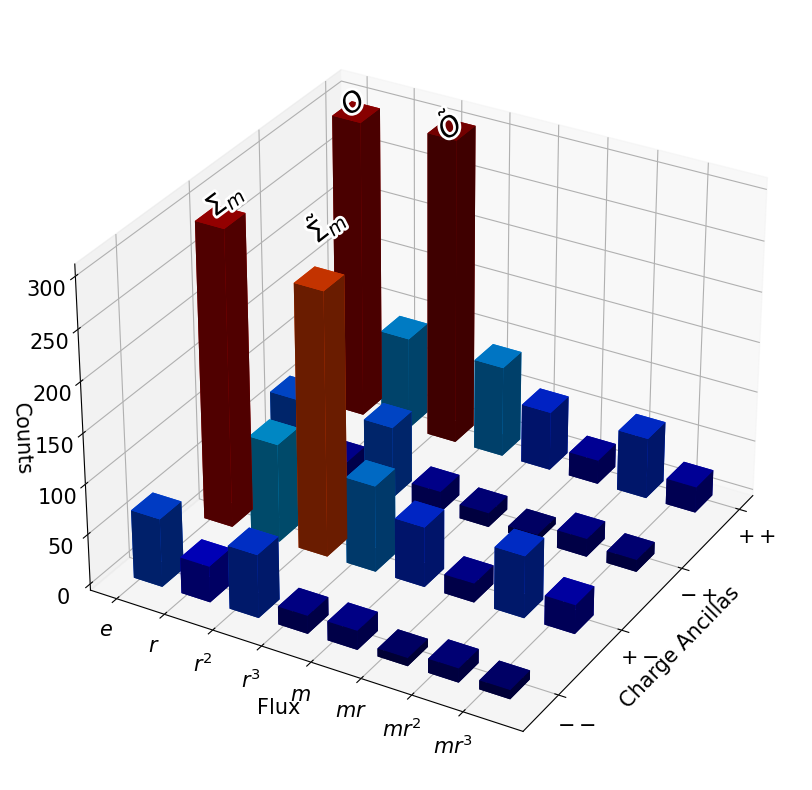

In [36]:
# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

import matplotlib.patheffects as pe
ax1.text(0,-1/3,280, r'$O$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(0,2-1/3,280, r'$\tilde{O}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,-1/3,280, r'$\Sigma_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,2-1/3,280, r'$\tilde{\Sigma}_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax1.view_init(elev=30, azim=30)
plt.savefig('fusion_r_mes.png', dpi=300)
plt.show()



In [37]:
[[69. 41. 68. 41. 21. 13. 30. 12.]
 [42. 27. 39. 34. 21.  6. 17.  7.]
 [75. 31. 81. 40. 14.  9. 27.  8.]
 [46. 24. 40. 21. 17. 10. 12.  5.]]

 '10k runs'

 [[62. 34. 57. 44. 20. 13. 24.  6.]
 [40. 23. 45. 24. 12.  5. 12.  6.]
 [70. 29. 79. 40. 24.  7. 20. 10.]
 [38. 22. 35. 27. 15.  5.  7.  8.]]

 '10k runs'

 [[88. 38. 65. 30. 32. 19. 27. 11.]
 [39. 25. 30. 18. 16. 11. 16.  6.]
 [69. 37. 71. 40. 19. 17. 20. 14.]
 [38. 26. 39. 22. 13.  6.  7.  5.]]

 '10k runs'

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2019533707.py, line 1)